## Cats and Dogs - Preparing Labeled Data Matrices ##

Produce the labeled data matrices X and Y by reading all 25000 images in the "train" folder.

You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats.
Download train.zip and unzip the 25000 files and move them to a folder and note the file path. For example, mine was C:\Users\haiho\Dropbox_Professor\ECE_fall 2020\CPE4903\Animals\tres) :"
Use train_test_split (with randomization) to split the data between train and test at 80/20. Be vigilant and verify the dimensions of X,Y throughout
Display the resulting data matrices that should look like the following:
Shape of X_train is: (12288, 20000)
Shape of X_test is: (12288, 5000)
Shape of Y_train is: (1, 20000)
Shape of Y_test is: (1, 5000)
Display the first 5 values of X_trai
n and Y_train
Complete the code file to produce the following data matrices:
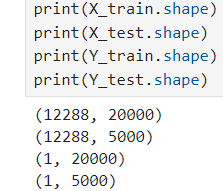

You would need to have the opencv library installed via Anaconda.

AFter having generate the labeled data, save them in a binary file using this command:
np.savez_compressed('cats_equal_1', X_train, X_test, Y_train, Y_test )

Submit your notebook and data file

In [2]:
# updated spring 2024
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
#Make sure do not have words "cat" or "dog" in path name  
TRAIN_DIR = r'C:\Neural Networks and Machine Learning\train'
ROWS = 64
COLS = 64
CHANNELS = 3

In [4]:
os.listdir(TRAIN_DIR)[0:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [5]:
train_images = [TRAIN_DIR+'\\'+i for i in os.listdir(TRAIN_DIR)]
train_images[0:2]

['C:\\Neural Networks and Machine Learning\\train\\cat.0.jpg',
 'C:\\Neural Networks and Machine Learning\\train\\cat.1.jpg']

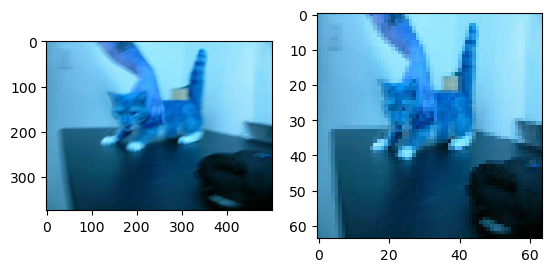

i =  0
C:\Neural Networks and Machine Learning\train\cat.0.jpg
Shape of resized image is (64, 64, 3)


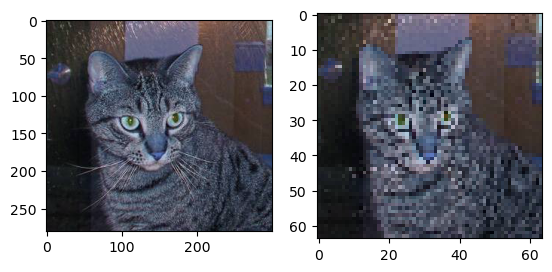

i =  1
C:\Neural Networks and Machine Learning\train\cat.1.jpg
Shape of resized image is (64, 64, 3)


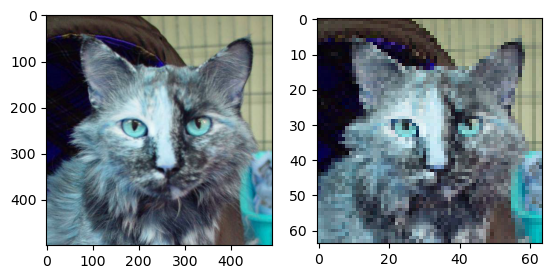

i =  2
C:\Neural Networks and Machine Learning\train\cat.10.jpg
Shape of resized image is (64, 64, 3)


In [6]:
# Correct directory path
TRAIN_DIR = r'C:\Neural Networks and Machine Learning\train'

# List images in the directory
train_images = [os.path.join(TRAIN_DIR, i) for i in os.listdir(TRAIN_DIR)]

# Check image paths and load images #I was having serious issues finding the data but 
#I moved the training data to the root of my file and was able to find images that way.
for i, image_file in enumerate(train_images):
    img = cv2.imread(image_file, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"Error loading image: {image_file}")
        continue
    if img.size == 0:
        print(f"Empty image: {image_file}")
        continue

    #I resized the images without relying on ROWS/COLS
    img_resized = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_resized)
    plt.show()
    print('i = ', i)
    print(image_file)
    print('Shape of resized image is {}'.format(img_resized.shape))
    time.sleep(2)
    if i == 2:
        break


In [7]:
img_resized.shape

(64, 64, 3)

In [8]:
# falttens matrix to vector rank 0 type
x = np.squeeze(img_resized.reshape((ROWS*COLS*CHANNELS,1)))
x.shape

(12288,)

In [9]:
print(image_file)
if 'cat' in image_file.lower() :
    print('cat, output = 1')
else:
    print('dog, output = 0')
        

C:\Neural Networks and Machine Learning\train\cat.10.jpg
cat, output = 1


In [10]:
'dog' in image_file.lower()

False

In [11]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [12]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'cat' in image_file.lower() :
      y[0,i] = 1
    elif 'dog' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      print('Error - no label found')  
            
    if i%100 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [13]:
X, Y = prep_data(train_images)

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 100 of 25000
Proceed 200 of 25000
Proceed 300 of 25000
Proceed 400 of 25000
Proceed 500 of 25000
Proceed 600 of 25000
Proceed 700 of 25000
Proceed 800 of 25000
Proceed 900 of 25000
Proceed 1000 of 25000
Proceed 1100 of 25000
Proceed 1200 of 25000
Proceed 1300 of 25000
Proceed 1400 of 25000
Proceed 1500 of 25000
Proceed 1600 of 25000
Proceed 1700 of 25000
Proceed 1800 of 25000
Proceed 1900 of 25000
Proceed 2000 of 25000
Proceed 2100 of 25000
Proceed 2200 of 25000
Proceed 2300 of 25000
Proceed 2400 of 25000
Proceed 2500 of 25000
Proceed 2600 of 25000
Proceed 2700 of 25000
Proceed 2800 of 25000
Proceed 2900 of 25000
Proceed 3000 of 25000
Proceed 3100 of 25000
Proceed 3200 of 25000
Proceed 3300 of 25000
Proceed 3400 of 25000
Proceed 3500 of 25000
Proceed 3600 of 25000
Proceed 3700 of 25000
Proceed 3800 of 25000
Proceed 3900 of 25000
Proceed 4000 of 25000
Proceed 4100 of 25000
Proceed 4200 of 25000
Proceed 4300 of 25000
Proceed 4400 of 25

In [14]:
(X.shape, Y.shape)

((12288, 25000), (1, 25000))

In [15]:
Y[0,0:20]
# as can be seen, we need to randomize the labels - next

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [16]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
# X (m x nx) and Y (mx1)

# You put in the rest of the code
# Define the proportion for the train-test split
test_size = 0.2

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=test_size, random_state=42)

# Transpose the Y_train and Y_test to ensure proper dimensions
Y_train = Y_train.reshape(-1, 1).T
Y_test = Y_test.reshape(-1, 1).T

# Display the shapes of the resulting matrices
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of Y_train is:", Y_train.shape)
print("Shape of Y_test is:", Y_test.shape)

# Display the first 5 values of X_train and Y_train
print("First 5 values of X_train:")
print(X_train[:5])
print("First 5 values of Y_train:")
print(Y_train[:,:5])

Shape of X_train is: (20000, 12288)
Shape of X_test is: (5000, 12288)
Shape of Y_train is: (1, 20000)
Shape of Y_test is: (1, 5000)
First 5 values of X_train:
[[ 15  15  21 ...  83  87  97]
 [214 205 168 ... 216 189 152]
 [  8  12  17 ... 111 103 113]
 [117  76 118 ...  64  93 124]
 [196 196 180 ...  18  14  13]]
First 5 values of Y_train:
[[0. 0. 1. 0. 1.]]


In [17]:
np.savez_compressed('cats_equal_1', X_train, X_test, Y_train, Y_test )

In [18]:
#I have the values of training and testing backwards for X for some reason..